### Note
This notebook eplains the neural network implementation and usage.
For the actual source code, check out neural_network.py and main.py

In [1]:
import numpy as np
import scipy.special

## Neural Network class definition

Contains the train and query methods

Train takes in an input list and a target list and uses this data to train the Neural network and uses back propagation to change the node weights.

Query takes in an input list and returns a prediction based on the learning performed in the Train method.


In [2]:
class NeuralNetwork(object):
    ''' NeuralNetwork class definition '''
    # Init
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # Learning rate
        self.lrate = learningrate

        # link weights wih and who
        # random weights are sampled from a normal distribution centred around 0.0
        # and a standard deviation of 1/sqrt(number of incoming links)
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # activation function here is the sigmoid function 
        # expit is the inbuilt sigmoid function in scipy
        self.activation_function = lambda x: scipy.special.expit(x)
        
        
    def train(self, inputs_list, targets_list):
        ''' This function trains the neural network '''
        # Convert inputs list to 2D array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # calculate signals into hidden layers
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate the signals into the final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)
      
        # Calculate the errors 
        # output error is target - output
        output_errors = targets - final_outputs

        # hidden layer error is output_errors split by the weights.
        hidden_errors = np.dot(self.who.T, output_errors)

        #update the weights between hidden and output layer
        self.who += self.lrate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        #update the weights between the input and the hidden layer
        self.wih += self.lrate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

    def query(self, inputs_list):
        ''' Query the neural network '''
        # convert inputs list into 2d array
        inputs = np.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layers
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate the signals into the final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [3]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

Import the required libraries.

In [4]:
from __future__ import division
from sklearn.datasets import fetch_mldata
from neural_network import NeuralNetwork 
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## MNIST

Fetch the MNIST data set.

Contains a total of 70000 images and corresponding labels.

Split the first 60000 as the training set and the remaining 10000 as the test set.

In [5]:
# Fetch the MNIST data
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

# Split the data into test and train set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
   
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

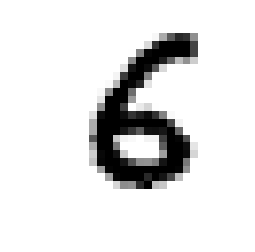

6.0


In [6]:
some_digit = X[37000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print(y[37000])

## Instantiate the neural network.

Input nodes = 784 as that is the number of pixels in the MNIST input.

Hidden nodes = 200 

output nodes = 10 to predict which number the NN predicts.

In [7]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# Learning rate = 0.1
learning_rate = 0.1

# Create an instance of neural network
nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

## Train the neural network

Train the neural network on the test set

In [8]:
# Train the neural network
# epochs is the number of times the training set is used to train the neural network
epochs = 5
for e in range(epochs):
    msg = "Training epoch " + str(e + 1) + " of " + str(epochs) + "..."
    print (msg)
    index = 0
    # Go through all the records in the training set
    for record in X_train:
        scaled_input = (np.asfarray(record) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(y_train[index])] = 0.99
        nn.train(scaled_input, targets)
        index = index + 1
            
print("Training complete!!!")

Training epoch 1 of 5...
Training epoch 2 of 5...
Training epoch 3 of 5...
Training epoch 4 of 5...
Training epoch 5 of 5...
Training complete!!!


## Test the neural network

Test the neural network on the test set.

This test randomly chooses some of the incorrect predictions and prints the image and what the NN predicted.

Testing the Neural Network.


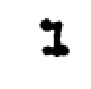

Predicted as  2  but actually  1.0


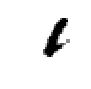

Predicted as  6  but actually  1.0


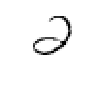

Predicted as  3  but actually  2.0


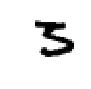

Predicted as  5  but actually  3.0


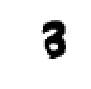

Predicted as  8  but actually  3.0


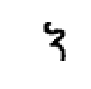

Predicted as  7  but actually  3.0


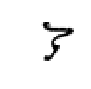

Predicted as  7  but actually  3.0


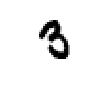

Predicted as  8  but actually  3.0


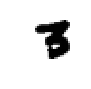

Predicted as  8  but actually  3.0


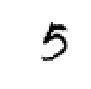

Predicted as  3  but actually  5.0


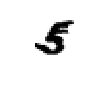

Predicted as  8  but actually  5.0


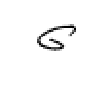

Predicted as  5  but actually  6.0


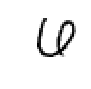

Predicted as  0  but actually  6.0


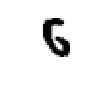

Predicted as  5  but actually  6.0


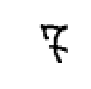

Predicted as  8  but actually  7.0


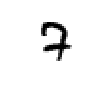

Predicted as  2  but actually  7.0


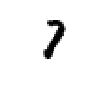

Predicted as  2  but actually  7.0


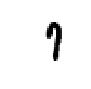

Predicted as  9  but actually  7.0


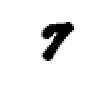

Predicted as  8  but actually  7.0


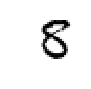

Predicted as  5  but actually  8.0


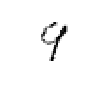

Predicted as  4  but actually  9.0


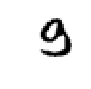

Predicted as  3  but actually  9.0


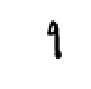

Predicted as  1  but actually  9.0


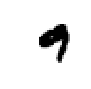

Predicted as  4  but actually  9.0


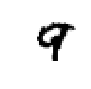

Predicted as  8  but actually  9.0


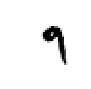

Predicted as  4  but actually  9.0


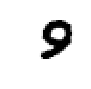

Predicted as  2  but actually  9.0


In [9]:
# test the neural network

# scorecard for how well the network performs
scorecard = []

print("Testing the Neural Network.") 
index = 0;
for record in X_test:
    scaled_input = (np.asfarray(record) / 255.0 * 0.99) + 0.01
    correct_label = y_test[index]
    index = index + 1
    outputs = nn.query(scaled_input)
    label = np.argmax(outputs)

    #append correct or incorrect to list
    if(label == correct_label):
        scorecard.append(1)
    else:
        #print("NN prediction = ", label)
        #print("Actual label = ", correct_label)
        
        #Randomly print some wrong predictions
        if(np.random.randint(0, 10) == 1):
            plot_digit(record)
            print("Predicted as ", label, " but actually ", correct_label)
        scorecard.append(0)


## Calculate the performance of the NN on the test set

In [10]:
#calulate the performance
scorecard_array = np.asarray(scorecard)
#print("sum = ", scorecard_array.sum())
#print("size = ", scorecard_array.size)
print("Performance of the Neural Network = ", scorecard_array.sum() / scorecard_array.size)

Performance of the Neural Network =  0.9759


### Check a random entry in the test set

In [11]:
randomIndex = np.random.randint(0,10000)

record = X_test[randomIndex]
scaled_input = (np.asfarray(record) / 255.0 * 0.99) + 0.01

outputs = nn.query(scaled_input)
label = np.argmax(outputs)

print ("Prediction is ", label)

Prediction is  3


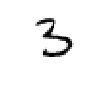

In [12]:
plot_digit(record)